In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r'C:\Users\krish\OneDrive\Documents\mini proj\payment-practices.csv')
data.head()

,Report Id,Start date,End date,Filing date,Company,Company number,Payments made in the reporting period,Average time to pay,% Invoices paid within 30 days,% Invoices paid between 31 and 60 days,...,Longest standard payment period,Maximum contractual payment period,Payment terms have changed,Suppliers notified of changes,Participates in payment codes,E-Invoicing offered,Supply-chain financing offered,Policy covers charges for remaining on supplier list,Charges have been made for remaining on supplier list,URL
0,2,29-04-2017,28-10-2017,07-11-2017,MEDTRONIC LIMITED,1070807,NaN,25.0,77.0,20.0,...,60.0,60.0,False,NaN,False,True,False,False,False,https://check-payment-practices.service.gov.uk...
1,3,01-05-2017,31-10-2017,08-11-2017,SEBDEN STEEL SERVICE CENTRES LIMITED,2553464,NaN,69.0,7.0,28.0,...,NaN,75.0,False,NaN,False,False,False,False,False,https://check-payment-practices.service.gov.uk...
2,4,15-04-2017,14-10-2017,08-11-2017,GREENERGY FLEXIGRID LIMITED,7581532,NaN,21.0,89.0,9.0,...,30.0,30.0,False,NaN,False,False,False,True,True,https://check-payment-practices.service.gov.uk...
3,5,15-04-2017,14-10-2017,08-11-2017,GREENERGY FUELS LIMITED,4058825,NaN,14.0,90.0,8.0,...,30.0,30.0,False,NaN,False,False,False,True,True,https://check-payment-practices.service.gov.uk...
4,6,15-04-2017,14-10-2017,08-11-2017,GREENERGY INTERNATIONAL LIMITED,2809935,NaN,15.0,96.0,2.0,...,30.0,30.0,False,NaN,False,False,False,True,False,https://check-payment-practices.service.gov.uk...


In [3]:
# Drop columns that are not useful for the model
columns_to_drop = ['Report Id','Start date', 'End date', 'Filing date', 'Company', 'Company number','URL']
data = data.drop(columns=columns_to_drop)

In [4]:
# Missing data
missing_data = pd.DataFrame({'total_missing': data.isnull().sum(), 'perc_missing': (data.isnull().mean())*100})
missing_data

,total_missing,perc_missing
Payments made in the reporting period,14673,18.888789
Average time to pay,6859,8.829701
% Invoices paid within 30 days,6859,8.829701
% Invoices paid between 31 and 60 days,6859,8.829701
% Invoices paid later than 60 days,6859,8.829701
% Invoices not paid within agreed terms,6708,8.635316
Shortest (or only) standard payment period,6708,8.635316
Longest standard payment period,30562,39.342954
Maximum contractual payment period,6708,8.635316
Payment terms have changed,6708,8.635316


In [5]:
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns

In [6]:
data = data.dropna(subset=['Average time to pay'])
data['Payments made in the reporting period'] = data['Payments made in the reporting period'].fillna(0)
data['Suppliers notified of changes'] = data['Suppliers notified of changes'].fillna(1)
for col in numerical_features:
    data[col] = data[col].fillna(data[col].mean())

In [7]:
data = data.astype(int)

In [8]:
# Missing data
missing_data = pd.DataFrame({'total_missing': data.isnull().sum(), 'perc_missing': (data.isnull().mean())*100})
missing_data

,total_missing,perc_missing
Payments made in the reporting period,0,0.0
Average time to pay,0,0.0
% Invoices paid within 30 days,0,0.0
% Invoices paid between 31 and 60 days,0,0.0
% Invoices paid later than 60 days,0,0.0
% Invoices not paid within agreed terms,0,0.0
Shortest (or only) standard payment period,0,0.0
Longest standard payment period,0,0.0
Maximum contractual payment period,0,0.0
Payment terms have changed,0,0.0


80th Quantile =  47.0


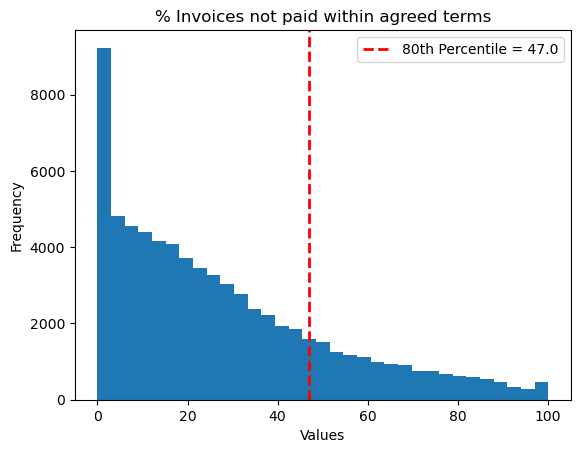

In [9]:
# Bar plot for '% Invoices not paid within agreed terms' and 80th percentile
percentile_80 = np.percentile(data['% Invoices not paid within agreed terms'].dropna(), 80)
print('80th Quantile = ',percentile_80)

plt.hist(data['% Invoices not paid within agreed terms'],bins=33)
plt.axvline(x=percentile_80, color='red', linestyle='dashed', linewidth=2, label='80th Percentile = '+str(percentile_80))

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('% Invoices not paid within agreed terms')

# Show the plot
plt.legend()
plt.show()

In [10]:
# Creating target column 'flag' based on the 80th percentile
data['flag'] = 0
data.loc[data['% Invoices not paid within agreed terms'] > percentile_80, 'flag'] = 1
data.drop(columns=['% Invoices not paid within agreed terms'],inplace=True)

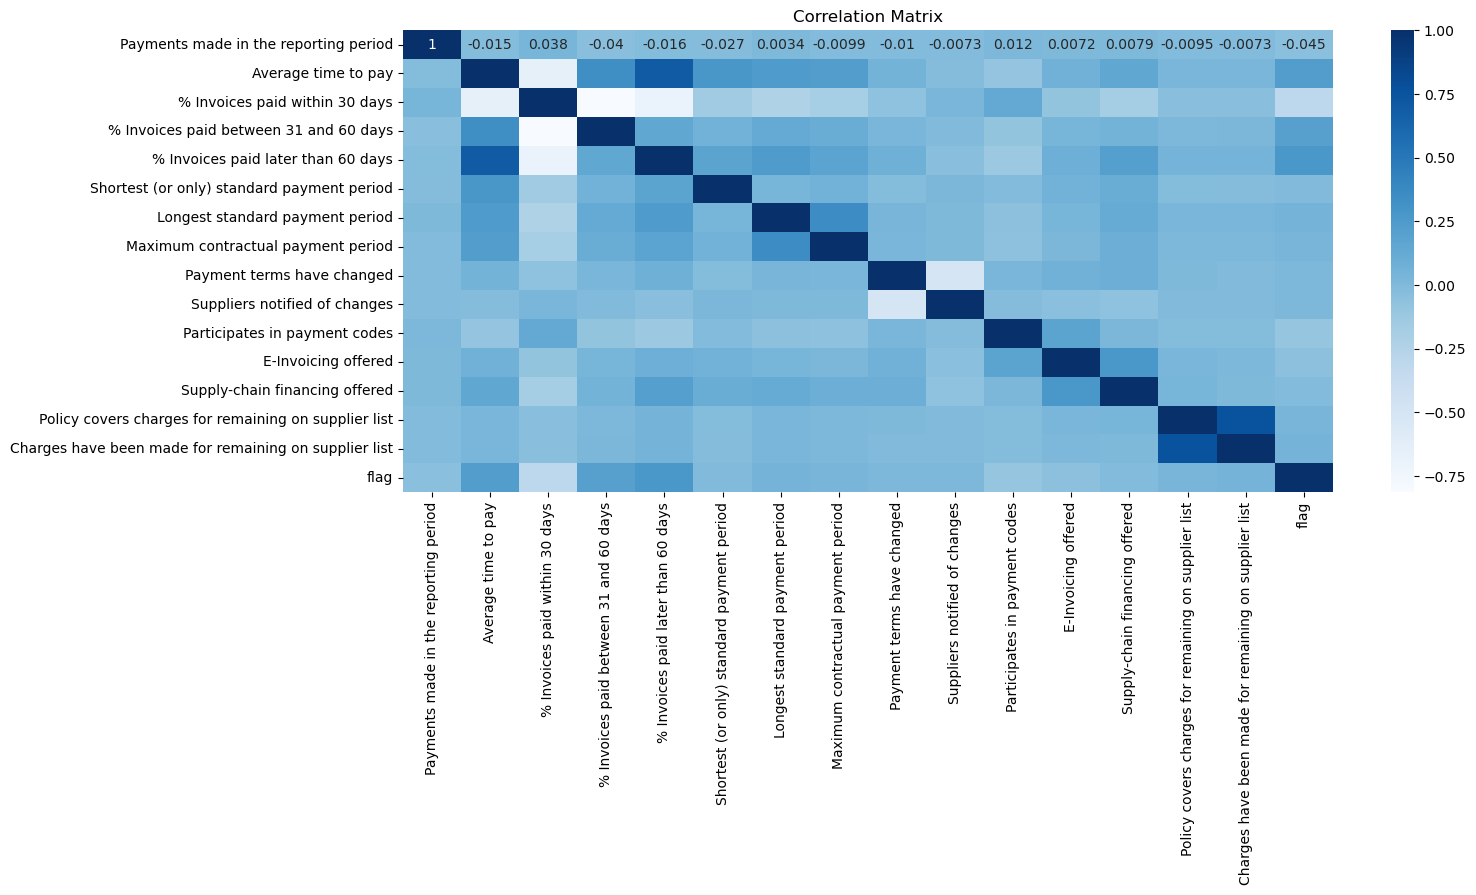

In [11]:
# Visualize the relationship between numerical columns using a correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(15, 6))
sns.heatmap(correlation_matrix,annot=True,cmap='Blues')
plt.title('Correlation Matrix')
plt.show()



In [12]:
correlation_threshold = 0.69
for feature, feature_values in correlation_matrix.items():
  for other_feature, correlation in feature_values.items():
    if feature != other_feature and abs(correlation) >= correlation_threshold:
      print(f"{feature} is highly correlated with {other_feature} (correlation: {correlation:.2f})")

Average time to pay is highly correlated with % Invoices paid later than 60 days (correlation: 0.70)
% Invoices paid within 30 days is highly correlated with % Invoices paid between 31 and 60 days (correlation: -0.81)
% Invoices paid within 30 days is highly correlated with % Invoices paid later than 60 days (correlation: -0.70)
% Invoices paid between 31 and 60 days is highly correlated with % Invoices paid within 30 days (correlation: -0.81)
% Invoices paid later than 60 days is highly correlated with Average time to pay (correlation: 0.70)
% Invoices paid later than 60 days is highly correlated with % Invoices paid within 30 days (correlation: -0.70)
Policy covers charges for remaining on supplier list is highly correlated with Charges have been made for remaining on supplier list (correlation: 0.76)
Charges have been made for remaining on supplier list is highly correlated with Policy covers charges for remaining on supplier list (correlation: 0.76)


In [13]:
# Dropping the Highly correlated Features
data = data.drop(columns=[ '% Invoices paid within 30 days', 
                            '% Invoices paid later than 60 days',
                            'Suppliers notified of changes',
                            'Policy covers charges for remaining on supplier list',])

In [14]:
X = data.drop(columns=['flag'])
y = data['flag']

In [15]:
from sklearn.model_selection import train_test_split
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)

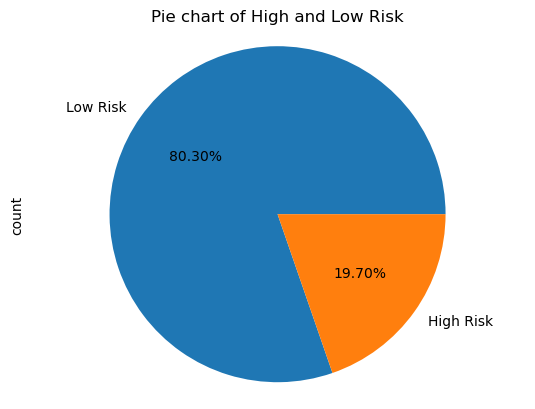

In [16]:
# Pie chart of High and Low Risk before Sampling
y_train.value_counts().plot.pie(autopct='%1.2f%%',labels=['Low Risk','High Risk'])
plt.axis('equal')
plt.title('Pie chart of High and Low Risk')
plt.show()

In [17]:
from collections import Counter
from imblearn.over_sampling import SMOTE

# Assuming you have loaded your data (X, y) where X is features and y is target variable
# Check class distribution
print(Counter(y_train))

# Define and fit SMOTE for oversampling the minority class
smote = SMOTE()  # Specify categorical feature indexes

# Oversample the data using SMOTE
X_train, y_train = smote.fit_resample(X_train, y_train)

# Check class distribution after resampling
print(Counter(y_train))

Counter({0: 37913, 1: 9301})
Counter({0: 37913, 1: 37913})


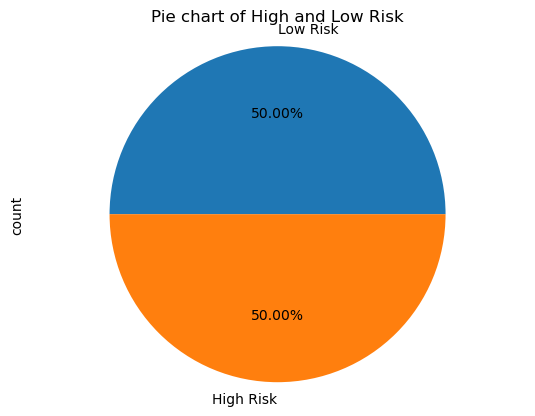

In [18]:
# Pie chart of High and Low Risk before Sampling
y_train.value_counts().plot.pie(autopct='%1.2f%%',labels=['Low Risk','High Risk'])
plt.axis('equal')
plt.title('Pie chart of High and Low Risk')
plt.show()

Deep Leaning

In [19]:
epochs = 30

In [20]:
from keras.models import Sequential
from keras.layers import Dense

# Create a sequential model
model = Sequential()

# Add layers to the model
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=epochs, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)
y_pred = [i[0] for i in y_pred]

# F1 score
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print('F1 Score:', f1)

ModuleNotFoundError: No module named 'keras'

In [ ]:
# CNN Model
from keras.layers import Conv1D, MaxPooling1D, Flatten

# Create a sequential model
model = Sequential()

# Add layers to the model
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=epochs, batch_size=32)

y_pred = model.predict(X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1))

y_pred = (y_pred > 0.5).astype(int)

# F1 score
f1 = f1_score(y_test, y_pred)
print('F1 Score:', f1)